# $\chi^2$ fitting/minimisation:

Given the functional form:

$r(p) = \frac{y_i - f(x_i,p)}{\sigma_i}$

where $y_i$ are the data points and $f(x_i,p)$ is the model.


$\chi^2$ minimisation requires you to minimise it so that we find the best value of $p$:

$\min \sum_1^N (r(p))^2$

The advantage of this method is that you can include the uncertainties in $y_i$.

## Example 1: Simple Pendulum

Let's take a look at the simple pendulum experiment from physics 1.

In the lab, you are normally asked to collect data points for differents lengths and periods of simple pendulum experiments. To collect each data point, we fix the length of the pendulum, move the pendulum bob by a small angle and release it. Subsequently, we use a chronometer to record the time ot takes for the bob to complete a period. Several measurementes can be collected to build up statistics.

### Length-period relation:

The pendulum equations result in a physically-motivated model for the relationship between the lenght and period of the pendulum.

$$T = 2\pi\sqrt{\frac{L}{g}}$$

$$T = \frac{2\pi}{\sqrt{g}}\sqrt{L}$$

$$T = \beta\sqrt{L}$$


### Base example on LM regression:

- We will carry out an LM regression using the averages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!head data_pendulum.csv

Length(m),Period1(s),Period2(s),Period3(s),Period4(s),Period5(s)
0.1,0.53,0.52,0.60,0.65,0.59
0.2,0.92,0.91,0.93,0.92,0.89
0.3,1.17,1.14,1.15,1.16,1.18
0.4,1.27,1.30,1.31,1.27,1.29
0.5,1.37,1.36,1.40,1.41,1.42
0.6,1.52,1.55,1.56,1.54,1.53
0.7,1.66,1.61,1.69,1.67,1.65
0.8,1.81,1.79,1.82,1.83,1.83
0.9,1.94,1.90,1.92,1.92,1.93


In [3]:
# Place the data file into a pandas df

def io_data(filename):
    """
    This is an I/O function that opens the pendulum data
    and return data arrays.
    Input: filename (str)
    Outputs: data arrays
    """
    
    # Create a pandas df
    df = pd.read_csv(filename, sep = ",")
    
    # Extract the arrays
    lengthp = np.array(df["Length(m)"])
    period1 = np.array(df["Period1(s)"])
    period2 = np.array(df["Period2(s)"])
    period3 = np.array(df["Period3(s)"])
    period4 = np.array(df["Period4(s)"])
    period5 = np.array(df["Period5(s)"])
    
    return lengthp, period1, period2, period3, period4, period5

In [4]:
# Define the path to the file

fname = "./data_pendulum.csv"

# Call our function 

l, t1, t2, t3, t4, t5 = io_data(fname)

# Safe check
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

[0.53 0.92 1.17 1.27 1.37 1.52 1.66 1.81 1.94 1.99]
[0.52 0.91 1.14 1.3  1.36 1.55 1.61 1.79 1.9  1.98]
[0.6  0.93 1.15 1.31 1.4  1.56 1.69 1.82 1.92 2.04]
[0.65 0.92 1.16 1.27 1.41 1.54 1.67 1.83 1.92 1.95]
[0.59 0.89 1.18 1.29 1.42 1.53 1.65 1.83 1.93 1.96]


### Calculate the mean and std of the period

- np.mean()

- np.std()

In [5]:
new_arr = np.array([t1, t2, t3, t4, t5])

print(new_arr)

[[0.53 0.92 1.17 1.27 1.37 1.52 1.66 1.81 1.94 1.99]
 [0.52 0.91 1.14 1.3  1.36 1.55 1.61 1.79 1.9  1.98]
 [0.6  0.93 1.15 1.31 1.4  1.56 1.69 1.82 1.92 2.04]
 [0.65 0.92 1.16 1.27 1.41 1.54 1.67 1.83 1.92 1.95]
 [0.59 0.89 1.18 1.29 1.42 1.53 1.65 1.83 1.93 1.96]]


In [8]:
# Place the mean and std into:

new_arr = np.array([t1, t2, t3, t4, t5])
print(new_arr.shape)

mean_t = np.mean(new_arr, axis = 0)

stdv_t = np.std(new_arr , axis = 0)

#print(mean_t.size)
#print(stdv_t.size)

print(mean_t)
print(stdv_t)

(5, 10)
[0.578 0.914 1.16  1.288 1.392 1.54  1.656 1.816 1.922 1.984]
[0.04791659 0.01356466 0.01414214 0.016      0.02315167 0.01414214
 0.026533   0.01496663 0.0132665  0.03136877]


### Plotting mean period vs. pendulum length




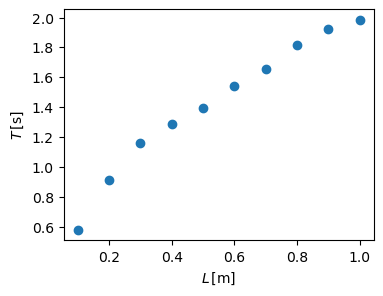

In [9]:
plt.figure(figsize=(4,3))

plt.plot(l, mean_t, marker = "o", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

### Plotting with errorbars:

We can use: plt.errorbar()

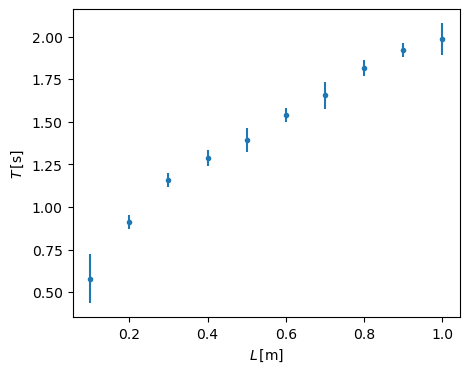

In [12]:
plt.figure(figsize=(5,4))

plt.errorbar(l, mean_t, 3.*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

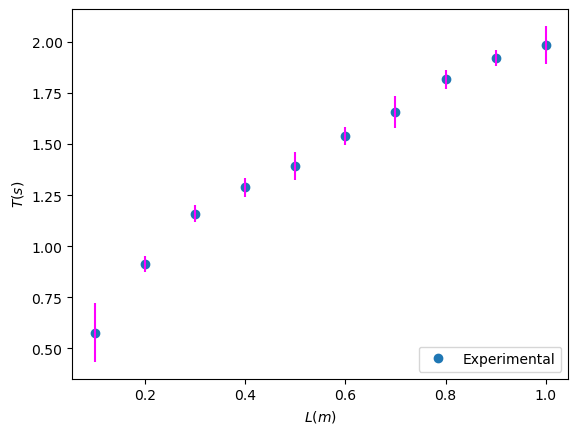

In [14]:
# Plot of the data

fig, ax = plt.subplots()

ax.plot(l, mean_t, linestyle = " ", marker = "o", label = "Experimental")
ax.errorbar(l, mean_t, yerr = 3*stdv_t, linestyle = " ", color = "magenta")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend(loc = 4)

plt.show()

### Applying the LM method:

In [15]:
import scipy.stats as st
import scipy.optimize as opt

In [17]:
# Let's calculate these coefficients

# 1. Spearman coefficient -> monoticity
sp = st.spearmanr(l, mean_t)

# 2. Pearson coefficient -> linearity
pe = st.pearsonr(l, mean_t)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)
Pearson:
 PearsonRResult(statistic=0.9817728684255518, pvalue=4.724114037134159e-07)


### Physically motivated model:

$$T = \beta\sqrt{L}$$


We will carry out the regression using curve_fit().

In [18]:
# Model function

def fit_model(x_values, beta):
    """
    This is our regression model.
    Inputs: x_values (lengths), beta -> free param.
    Output: y_values model
    """
    y_values = beta*np.sqrt(x_values)
    
    return y_values

In [19]:
# Call the curve_fit function

coef, cova = opt.curve_fit(fit_model, l, mean_t)

print(coef)

# Calculate uncertainties
unc_coef = np.sqrt(np.diag(cova))

print("The associated uncertainty are:\n", unc_coef)

[2.00651334]
The associated uncertainty are:
 [0.01442027]


### Plotting the regression result:

In [20]:
# Evaluate l in the regression model
mean_t_fit = fit_model(l, *coef)


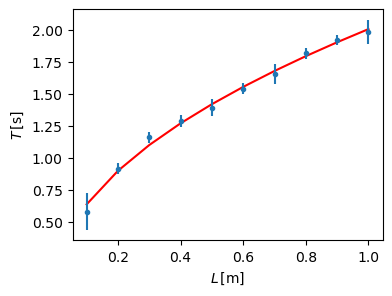

In [21]:
plt.figure(figsize=(4,3))

plt.plot(l, mean_t_fit, color = "red")
plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

### Calculating the acceleration of gravity:

$$g=\left(\frac{2\pi}{\beta}\right)^2$$

In [22]:
print("g in m/s^2= ", (2*np.pi/coef[0])**2)

g in m/s^2=  9.805633005014402


## $\chi^2$ fitting

### Method 1. Using our own functions:

#### Physically motivated model:

$$T = \beta\sqrt{L}$$


#### Remember:
$r(p) = \frac{y_i - f(x_i,p)}{\sigma_i}$

where $y_i$ are the data points and $f(x_i,p)$ is the model.


$\chi^2$ minimisation requires you to minimise it so that we find the best value of $p$:

$\min \sum_1^N (r(p))^2$

In [23]:
# Define a functional/chi^2 statistic

def chi_sqr_stat(beta):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    
    # Physically motivated model
    phys_model = beta*np.sqrt(l)
    
    # Use the chi^2 formula
    chi_sqr = np.sum((mean_t - phys_model)**2/(stdv_t)**2)
    
    return chi_sqr

### Optimisation routine to minimise our $\chi^2$ function:

We will use minimize from scipy.optimize:

We can use opt.minimize from the scipy package.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


This function minimises a scalar function of one or more variables.


The optimization result is represented as a OptimizeResult object with attributes:


- **x** the solution array
- **success** a Boolean flag indicating if the optimizer exited successfully
- **a message** which describes the cause of the termination.




### Manual optimisation:

$\beta_1 = 1.$

$\beta_2 = 7.$

$\beta_3 = 10.$


In [24]:
# First guess
beta_1 = 1.
with_guess1 = fit_model(l, beta_1)

# Second guess
beta_2 = 7.
with_guess2 = fit_model(l, beta_2)

# Third guess
beta_3 = 5.
with_guess3 = fit_model(l, beta_3)

# 4th guess
beta_4 = 1.5
with_guess4 = fit_model(l, beta_4)

# 5th guess
beta_5 = 2.6
with_guess5 = fit_model(l, beta_5)

# 6th guess
beta_6 = 2.
with_guess6 = fit_model(l, beta_6)

#### Plot with our guesses/ansatsz:

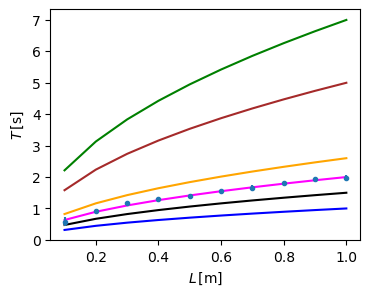

In [25]:
plt.figure(figsize=(4,3))

plt.plot(l, with_guess1, color = "blue")
plt.plot(l, with_guess2, color = "green")
plt.plot(l, with_guess3, color = "brown")
plt.plot(l, with_guess4, color = "black")
plt.plot(l, with_guess5, color = "orange")
plt.plot(l, with_guess6, color = "magenta")

plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

In [26]:
# Take the initial guess -> ansatsz (educated guess)
beta_0 = np.array((10.))

# Call the minimisation routine
res_pendulum = opt.minimize(chi_sqr_stat, beta_0)

# Print the result:
print(res_pendulum)

# Print the result:
print("Best-fit value is: ", res_pendulum.x[0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 25.982956559765892
        x: [ 2.022e+00]
      nit: 4
      jac: [ 7.868e-06]
 hess_inv: [[ 2.657e-05]]
     nfev: 10
     njev: 5
Best-fit value is:  2.0219601061213783


#### Plotting the result:

In [27]:
# Evaluate l in the regression model
mean_t_chi = fit_model(l, res_pendulum.x[0])

### Compare to the LM method:

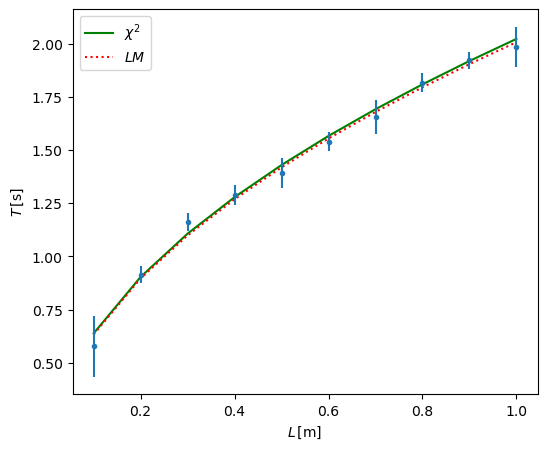

In [28]:
plt.figure(figsize=(6,5))

plt.plot(l, mean_t_chi, color = "green", label=r"$\chi^2$")
plt.plot(l, mean_t_fit, color = "red", linestyle = ":", label=r"$LM$")
plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")


plt.legend()
plt.show()

### Calculating the acceleration of gravity:

$$g=\left(\frac{2\pi}{\beta}\right)^2$$

In [29]:
print("g in m/s^2= ", (2*np.pi/res_pendulum.x)**2)

g in m/s^2=  [9.65638497]


### Goodness of fit:

One way to evaluate this is to calculate $\chi^2$:

In [30]:
print(res_pendulum.x[0])

chi_stat = chi_sqr_stat(res_pendulum.x[0])

print("chi^2 value: ", chi_stat)

chi_stat2 = chi_sqr_stat(2.05)

print("chi^2 value: ", chi_stat2)

chi_stat3 = chi_sqr_stat(1.95)

print("chi^2 value: ", chi_stat3)

2.0219601061213783
chi^2 value:  25.982956559765892
chi^2 value:  40.78107495148937
chi^2 value:  123.44548439557943


In [31]:
# Vector for chi^2
beta_vector = np.arange(1., 3., 0.001)

# Evaluate our functional using the above vector

# Empty list
chi_vector = []

for i in range(len(beta_vector)):
    chi_vector.append(chi_sqr_stat(beta_vector[i]))

chi_vector = np.array(chi_vector)
#print(beta_vector.shape, chi_vector.shape)

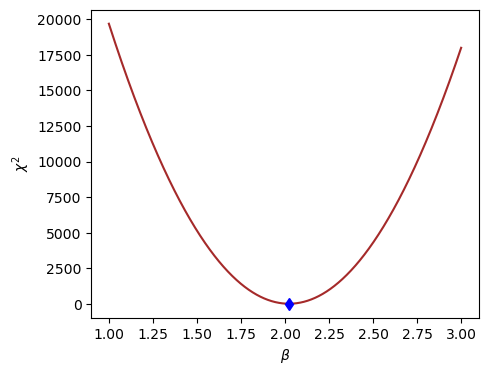

In [32]:
# Plotting chi^2

plt.figure(figsize=(5,4))

plt.plot(beta_vector, chi_vector, color = "brown", linestyle = "-")

plt.plot(res_pendulum.x, chi_stat, color = "blue", linestyle = " ",\
        marker = "d")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\chi^2$")

plt.show()

#### Reduced $\chi^2$:

$$\chi_{red}^2 = \frac{\chi^2}{\nu}$$

where $\nu = N - f$

Here $N$ is the number of data points and $f$ is the number of free parameters.

In [33]:
# Calculate nu:

nu = len(l) - len(res_pendulum.x)

print("The # of degrees of freedom is: ", nu)


# Reduced chi^2 value is:

red_chi = chi_stat/nu

print("The reduced chi^2 stat is: ", red_chi)

The # of degrees of freedom is:  9
The reduced chi^2 stat is:  2.886995173307321


## Example 2:  spectral fitting via $\chi^2$:

We are going to generate a noisy synthetic spectrum and use $\chi^2$ minimisation to find the best-fit model.

#### 1. Synthetic spectrum:

Gaussian profile:

$$g(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2} \right).$$

We need to code this function:

$$f(x) = g(x) + n(x) + b(x)$$

where $n(x)$ is noise, and b(x) is the spectral line baseline.

In [34]:
### Gaussian function:

def gaussian_x(x_val, mu, sigma):
    """
    This return the values for a normal distro.
    Inputs: x_val -> x axis, mu -> mean, sigma -> std. dev.
    Output: y_val
    """
    
    # Code the Gaussian
    coef_g = 1./(sigma*(np.sqrt(2*np.pi)))
    
    y_val = coef_g*np.exp(-0.5*(x_val - mu)**2/sigma**2)
    
    return y_val  

In [35]:
# Evaluate the function

mu_1 = 5.0
sigma_1 = 0.5

n_points = 100

x_val = np.linspace(0., 10., n_points)

y_val = gaussian_x(x_val, mu_1, sigma_1)

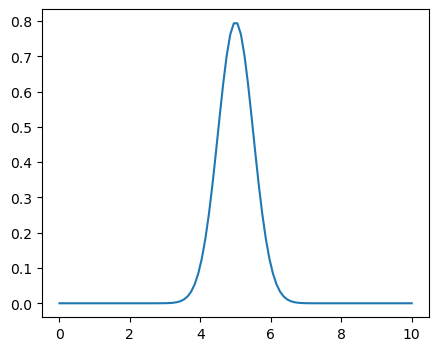

In [36]:
plt.figure(figsize=(5,4))

plt.plot(x_val, y_val)

plt.show()

In [37]:
# Add the noise

# Fix the seed
np.random.seed(77)

# Generate noise
n_val = 0.05*np.random.normal(0., 1., size = (n_points,))

print(y_val.shape, n_val.shape)

# Add the noise values to the Gaussian

y_val_wnoise = y_val + n_val

# Add the baseline
b_val = 0.5

# Our final mock spectral line
y_val_final = y_val + n_val + b_val 

(100,) (100,)


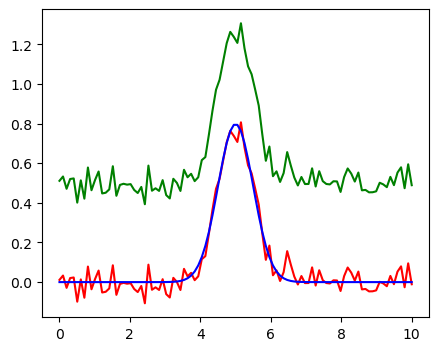

In [38]:
plt.figure(figsize=(5,4))

plt.plot(x_val, y_val_final, color = "green")

plt.plot(x_val, y_val_wnoise, color = "red")

plt.plot(x_val, y_val, color = "blue")


plt.show()

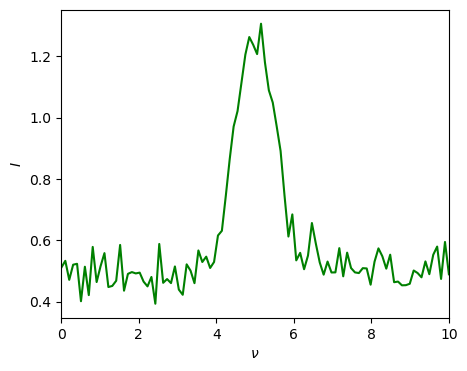

In [39]:
plt.figure(figsize=(5,4))

plt.plot(x_val, y_val_final, color = "green")

plt.xlim(0.,10.)

plt.xlabel(r"$\nu$")

plt.ylabel(r"$I$")

plt.show()

#### 2. Error bars

In [40]:
# Random errors

i_errors = 0.5*np.random.normal(0., 0.2, size = (n_points,))

print(i_errors)

[-0.00864977  0.07790996 -0.1613452  -0.12403119 -0.01311679 -0.0082674
 -0.17476185  0.05605389 -0.05245558  0.02868295 -0.05223578  0.12507131
 -0.08287157 -0.08827239 -0.19363424 -0.00156863  0.07627144  0.15069404
 -0.00294969  0.04870718 -0.08484399  0.0683826   0.07015695  0.02431994
 -0.10410154 -0.11320335  0.07975963 -0.17884712  0.15216882 -0.15755585
  0.0704011  -0.20537834  0.03090196  0.11567814  0.0957849   0.182268
  0.18479285 -0.03516925 -0.15336933 -0.02644023 -0.15627317  0.03789528
 -0.1179799  -0.06862013 -0.11061292 -0.02946241 -0.00256413  0.02805843
  0.15555242  0.0217495   0.01623319  0.02982086  0.1902109   0.18377969
 -0.01966055  0.03069428 -0.01411346  0.02270954  0.01324365  0.10283817
  0.01141739  0.20957028  0.11816123 -0.01205381 -0.06794064  0.06309331
  0.26184297 -0.04676452  0.06145787  0.16590146  0.08273472  0.00719003
 -0.00111745 -0.04063817 -0.16022857  0.01357763 -0.05301548  0.02860831
  0.03042315 -0.14964877 -0.05684289  0.06571184  0.07

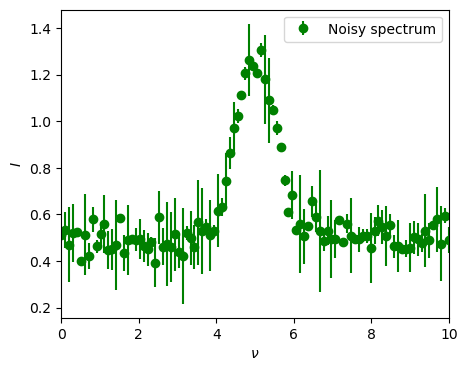

In [41]:
plt.figure(figsize=(5,4))

#plt.plot(x_val, y_val_final, color = "green")

plt.errorbar(x_val, y_val_final, abs(i_errors), color = "green",\
            fmt = "o", label = "Noisy spectrum") 

plt.xlim(0.,10.)

plt.xlabel(r"$\nu$")

plt.ylabel(r"$I$")

plt.legend()

plt.show()

#### 3. LM fitting with curve_fit():

In [42]:
### Objective function:

def gaussian_fit(x_val, mu, sigma, base):
    """
    This return the values for a normal distro.
    Inputs: x_val -> x axis, mu -> mean, sigma -> std. dev.
    Output: y_val
    """
    
    # Code the Gaussian
    coef_g = 1./(sigma*(np.sqrt(2*np.pi)))
    
    y_val = base + coef_g*np.exp(-0.5*(x_val - mu)**2/sigma**2)
    
    return y_val  

In [43]:
# Using the LM method (without sigmas)

coef_lm, cova_lm = opt.curve_fit(gaussian_fit, x_val, y_val_final)

print("Best-fit parameters", coef_lm)

print("Associate uncertainties:", np.sqrt(np.diag(cova_lm)))

Best-fit parameters [5.00682561 0.50943988 0.49901786]
Associate uncertainties: [0.01442661 0.01177927 0.00468842]


#### 4. $\chi^2$ fitting with curve_fit():

In [44]:
# Using the LM method (with sigmas)

coef_chi, cova_chi = opt.curve_fit(gaussian_fit, x_val, y_val_final, \
                                sigma = i_errors)

print("Best-fit parameters", coef_chi)

print("Associate uncertainties:", np.sqrt(np.diag(cova_chi)))

Best-fit parameters [5.0092785  0.51435321 0.51226831]
Associate uncertainties: [0.03175781 0.03898722 0.00482489]


#### 5. LM vs. $\chi^2$ Method Comparison

In [45]:
# Evaluate the LM regression model

y_lm  = gaussian_fit(x_val, *coef_lm)

# Evaluate the chi^2 regression model

y_chi  = gaussian_fit(x_val, *coef_chi)

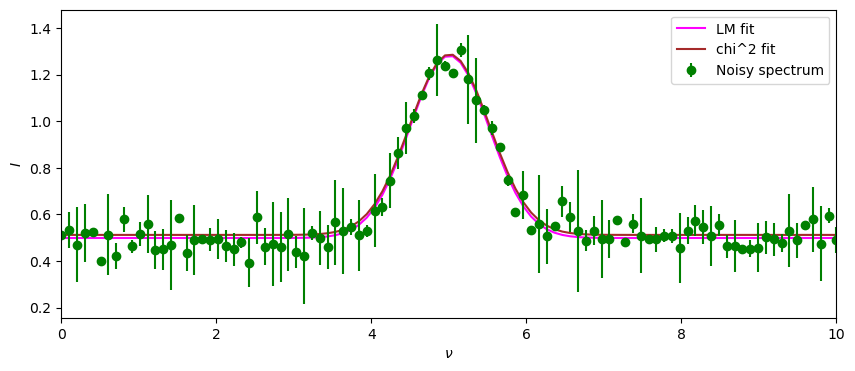

In [46]:
plt.figure(figsize=(10,4))

plt.plot(x_val, y_lm, color = "magenta", label ="LM fit")
plt.plot(x_val, y_chi, color = "brown", label ="chi^2 fit")

plt.errorbar(x_val, y_val_final, abs(i_errors), color = "green",\
            fmt = "o", label = "Noisy spectrum") 

plt.xlim(0.,10.)

plt.xlabel(r"$\nu$")

plt.ylabel(r"$I$")

plt.legend()

plt.show()

#### 5. Goodness of fit test:

We need to compute the $\chi^2$ statistic to assess how good/bad was out fit.

In [47]:
# Define a functional/chi^2 statistic

def chi_sqr_spectral(fex, fit, sigma):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    
    # Use the chi^2 formula
    chi_sqr = np.sum((fex - fit)**2/(sigma)**2)
    
    return chi_sqr

In [48]:
# Compute the chi^2 values

chi_spect_lm = chi_sqr_spectral(y_val_final, y_lm, i_errors)

chi_spect_ch = chi_sqr_spectral(y_val_final, y_chi, i_errors)

print("chi^2 for the LM fit: ", chi_spect_lm)
print("chi^2 for the chi^2 fit: ", chi_spect_ch)

chi^2 for the LM fit:  3704.056943948768
chi^2 for the chi^2 fit:  3431.867422986515


In [49]:
# Let us compute nu 

nu_spect = len(y_val_final) - len(coef_chi)

print(nu_spect)


97


In [50]:
# Reduced chi^2 stats:

chi_red_lm = chi_spect_lm/nu_spect

chi_red_ch = chi_spect_ch/nu_spect

print("Reduced chi^2 for the LM fit: ", chi_red_lm)
print("Reduced chi^2 for the chi^2 fit: ", chi_red_ch)

Reduced chi^2 for the LM fit:  38.18615406132751
Reduced chi^2 for the chi^2 fit:  35.38007652563417
